In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [2]:
def random_matrix(shape):
    A = np.random.rand(shape[0], shape[1])*50
    return A

def random_integer_matrix(shape):
    return np.floor(random_matrix(shape))

(350, 350)
125.016227649 120.910921562


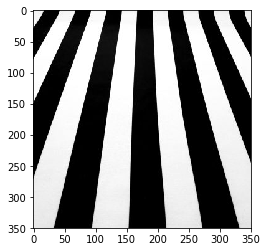

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

X = random_integer_matrix((5,15))
# print(X)

im = Image.open("image/image5.jpg")
data_orig = rgb2gray(np.array(im))
print(data_orig.shape)
print(np.mean(data_orig), np.std(data_orig))
plt.imshow(data_orig, cmap='gray')
plt.show()

In [4]:
# Hyperparamters
X = data_orig

W = X.shape[0]
K = X.shape[1]
shape = (W, K)
I = 200
T_shape = (W, I)
V_shape = (I, K)

In [5]:
# Gibbs Sampler
print(np.mean(X), np.std(X))

# Initialization

# mean = gamma_scale * gamma_shape
# variance = gamma_scale * gamma_shape^2
gamma_scale = 1.5
gamma_shape = 0.030 # b/sqrt(a) == std

A_t = np.ones(T_shape)*gamma_shape
B_t = np.ones(T_shape)*gamma_scale
A_v = np.ones(V_shape)*gamma_shape
B_v = np.ones(V_shape)*gamma_scale

T = np.random.gamma(A_t,B_t)
V = np.random.gamma(A_v,B_v)
print(np.mean(np.dot(T,V)), np.std(np.dot(T,V)))

mean_diff = np.mean(np.abs(X - np.dot(T,V)))
print("Random loss: ", mean_diff)

125.016227649 120.910921562
0.420578430786 0.983897646646
Random loss:  124.848479095


In [6]:
# Loop
max_iter = 20
for n in range(max_iter):
    
    p = np.zeros((W, I ,K))
    S = np.zeros((W, I ,K))
    
    for v in range(W):
        for t in range(K):
#             print(T.shape, V.shape, p.shape, t,v)
            p[v, :, t] = ((T[[v],:]*V[:, [t]].transpose())/
                         np.dot(T[[v],:],V[:, [t]]))
            S[v, :, t] = np.random.multinomial(X[v,t], p[v, :, t].squeeze())
    
    sigma_t = np.sum(S, axis=2)
    sigma_v = np.sum(S, axis=0)
    
#     print(T.shape, V.shape, W, K)
    
    alpha_t = A_t + sigma_t
    beta_t = 1./(A_t/B_t + 
                 np.dot(np.ones((W,1)), 
                        np.dot(V, np.ones((K,1))).T))
    
    alpha_v = A_v + sigma_v
    beta_v = 1./(A_v/B_v + 
                 np.dot(np.dot(np.ones((W,1)).T, T).T,
                        np.ones((K,1)).T))

    T = np.random.gamma(alpha_t, beta_t)
    V = np.random.gamma(alpha_v, beta_v)
    
    if n % 1 == 0:
        mean_diff = np.mean(np.abs(X - np.dot(T,V)))
        print("epoch %d: loss: "%n, mean_diff)

epoch 0: loss:  40186.6597723
epoch 1: loss:  124.769423089
epoch 2: loss:  39693.6377288
epoch 3: loss:  124.754905191
epoch 4: loss:  39592.040595
epoch 5: loss:  124.73349458
epoch 6: loss:  39474.1135219
epoch 7: loss:  124.70906641
epoch 8: loss:  39341.6008636
epoch 9: loss:  124.688742085
epoch 10: loss:  39265.8607143
epoch 11: loss:  124.673979247
epoch 12: loss:  39170.7786066
epoch 13: loss:  124.663298589
epoch 14: loss:  39053.8409888
epoch 15: loss:  124.655522586
epoch 16: loss:  38976.5272253
epoch 17: loss:  124.649205414
epoch 18: loss:  38853.8079191
epoch 19: loss:  124.6444116


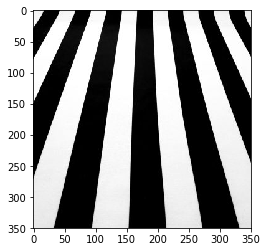

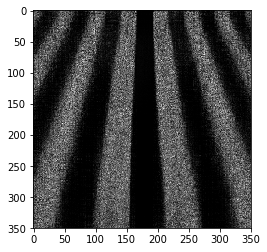

In [7]:
# print(X)
# print(np.dot(T,V))

plt.imshow(X*255, cmap='gray')
plt.show()
plt.imshow(np.dot(T,V)*255, cmap='gray')
plt.show()